In [182]:
from collections import Counter

In [130]:
import music21 as m21

from music21 import *


In [230]:
import numpy as np
import pandas as pd

In [305]:
import matplotlib.pylab as plt

In [152]:
piece = m21.converter.parse("./roman.xml")
vocal = piece.parts[0]

In [153]:
vocal.notes.stream().show("text")
#vocalnotes.show("text")
print("hoge")
vocal.show("text")


hoge
{0.0} <music21.instrument.Instrument P1: Synth Pad: Microsoft GS Wavetable Synth>
{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.layout.SystemLayout>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.tempo.MetronomeMark allegro Quarter=132.0>
    {0.0} <music21.key.KeySignature of 5 sharps>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.note.Rest rest>
    {2.0} <music21.note.Note D#>
    {2.5} <music21.note.Note E>
    {3.0} <music21.note.Note F#>
    {3.5} <music21.note.Note F#>
{4.0} <music21.stream.Measure 2 offset=4.0>
    {0.0} <music21.note.Note F#>
    {0.5} <music21.note.Note F#>
    {1.0} <music21.note.Note F#>
    {1.5} <music21.note.Note F#>
    {2.0} <music21.note.Note G#>
    {3.0} <music21.note.Note F#>
    {3.5} <music21.note.Note F#>
{8.0} <music21.stream.Measure 3 offset=8.0>
    {0.0} <music21.note.Note B>
    {0.5} <music21.note.Note B>
    {1.0} <music21.note.Rest rest>
    {1.5} <music21.note.Note B>
    {2.0} <music21.no

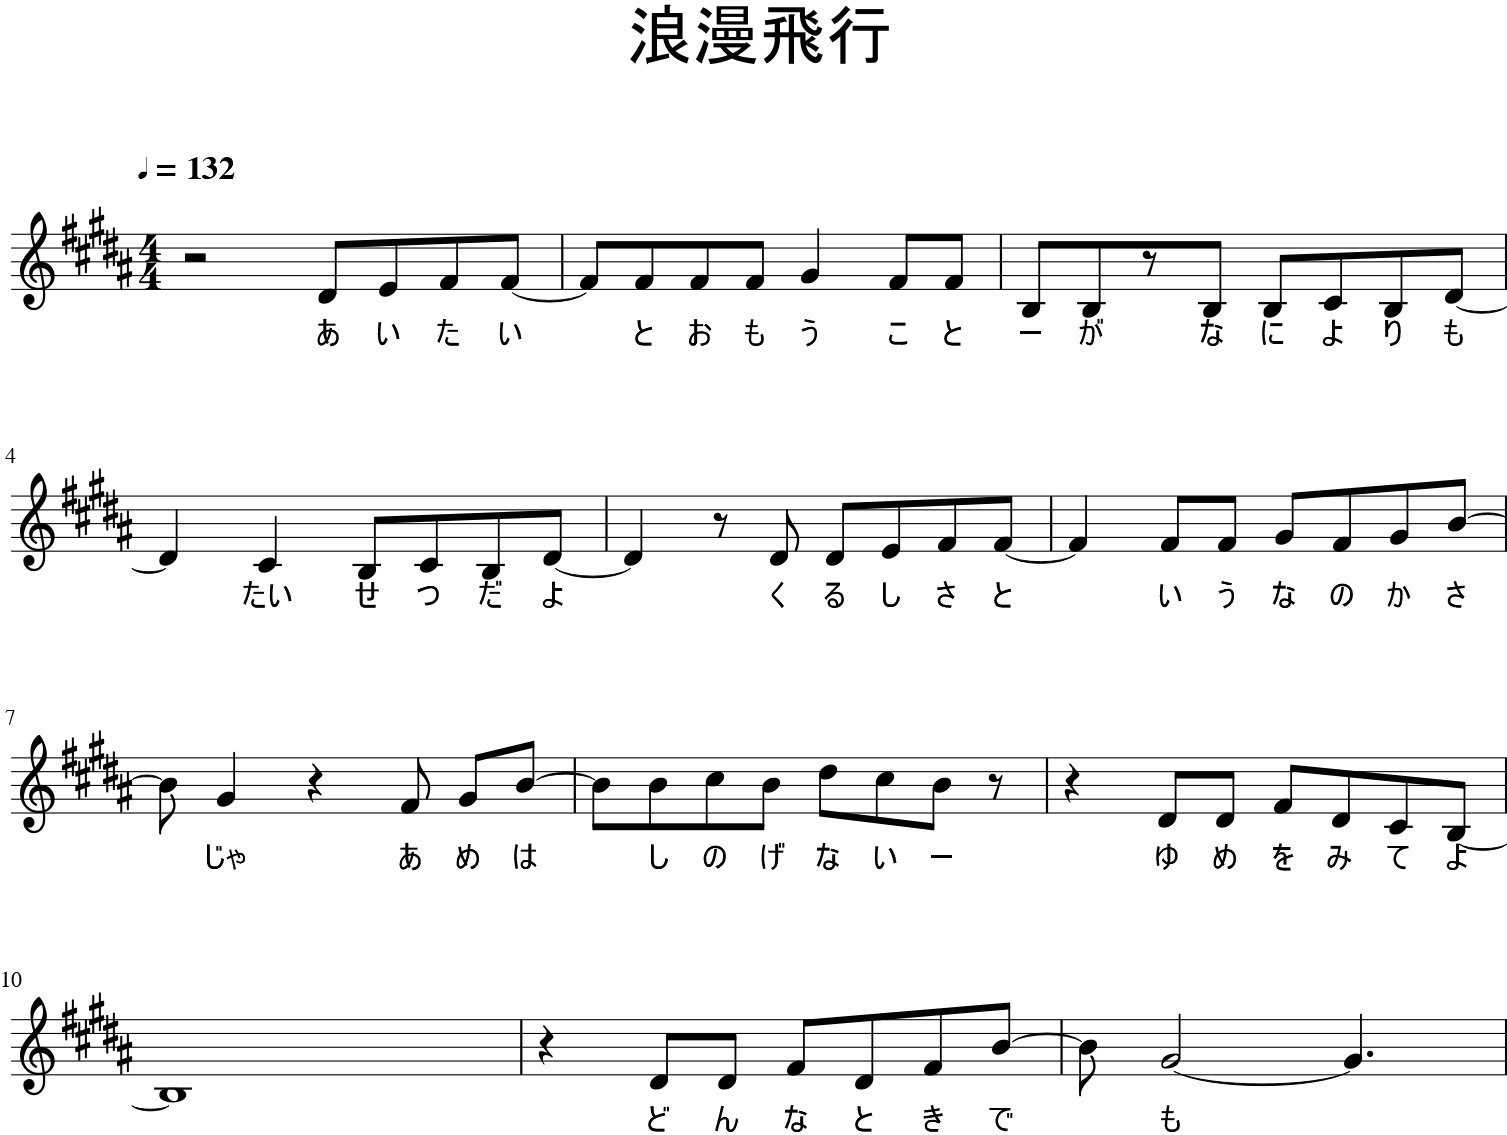

In [158]:
piece.parts[0].show()

In [231]:
"""
音価・音高のペアのオブジェクトを楽譜から作る
タイの部分→連結

"""



record = []
checker = False
#タイがついた場合の途中記録用
pitch_tmp = 0.0
duration_tmp = 0.0
for i in vocal.flat.notesAndRests.stream():
    
    #タイがついている
    if i.tie:
        #タイのはじめの音ならまず音高を記録する
        if checker == False:
            if i.isNote == True:
                #record.append([i.pitch.ps,i.duration.quarterLength])
                pitch_tmp = i.pitch.ps
                duration_tmp += i.duration.quarterLength
            elif i.isRest == True:
                #record.append(["rest",i.duration.quarterLength])
                pitch_tmp = np.inf
                duration_tmp += i.duration.quarterLength
                
        #タイの途中の音なら音長を足していく      
        else:
            duration_tmp += i.duration.quarterLength
            
        #タイはついている   
        checker = True
        
    #タイがついてない    
    else:
        checker = False
        #直前がタイの最後の音ならタイでつながって一音になった音を追加
        if not duration_tmp == 0.0:
            record.append([pitch_tmp,duration_tmp])
            duration_tmp = 0.0
            
        #そうでなければ普通に追加
        if i.isNote == True:
            record.append([i.pitch.ps,i.duration.quarterLength])
        elif i.isRest == True:
            record.append([np.inf,i.duration.quarterLength])

print(record)

[[inf, 2.0], [63.0, 0.5], [64.0, 0.5], [66.0, 0.5], [66.0, 1.0], [66.0, 0.5], [66.0, 0.5], [66.0, 0.5], [68.0, 1.0], [66.0, 0.5], [66.0, 0.5], [59.0, 0.5], [59.0, 0.5], [inf, 0.5], [59.0, 0.5], [59.0, 0.5], [61.0, 0.5], [59.0, 0.5], [63.0, 1.5], [61.0, 1.0], [59.0, 0.5], [61.0, 0.5], [59.0, 0.5], [63.0, 1.5], [inf, 0.5], [63.0, 0.5], [63.0, 0.5], [64.0, 0.5], [66.0, 0.5], [66.0, 1.5], [66.0, 0.5], [66.0, 0.5], [68.0, 0.5], [66.0, 0.5], [68.0, 0.5], [71.0, 1.0], [68.0, 1.0], [inf, 1.0], [66.0, 0.5], [68.0, 0.5], [71.0, 1.0], [71.0, 0.5], [73.0, 0.5], [71.0, 0.5], [75.0, 0.5], [73.0, 0.5], [71.0, 0.5], [inf, 0.5], [inf, 1.0], [63.0, 0.5], [63.0, 0.5], [66.0, 0.5], [63.0, 0.5], [61.0, 0.5], [59.0, 4.5], [inf, 1.0], [63.0, 0.5], [63.0, 0.5], [66.0, 0.5], [63.0, 0.5], [66.0, 0.5], [71.0, 4.5], [inf, 1.0], [63.0, 0.5], [63.0, 0.5], [66.0, 0.5], [63.0, 0.5], [66.0, 0.5], [71.0, 1.0], [71.0, 0.5], [70.0, 0.5], [68.0, 1.0], [66.0, 0.5], [68.0, 0.5], [68.0, 3.0], [70.0, 0.5], [68.0, 0.5], [66.0,

In [233]:
pitch_diff = []
for i in range(len(record)-1):
    pitch_diff.append(record[i+1][0] - record[i][0])
print(pitch_diff)

[-inf, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, -2.0, 0.0, -7.0, 0.0, inf, -inf, 0.0, 2.0, -2.0, 4.0, -2.0, -2.0, 2.0, -2.0, 4.0, inf, -inf, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 2.0, -2.0, 2.0, 3.0, -3.0, inf, -inf, 2.0, 3.0, 0.0, 2.0, -2.0, 4.0, -2.0, -2.0, inf, nan, -inf, 0.0, 3.0, -3.0, -2.0, -2.0, inf, -inf, 0.0, 3.0, -3.0, 3.0, 5.0, inf, -inf, 0.0, 3.0, -3.0, 3.0, 5.0, 0.0, -1.0, -2.0, -2.0, 2.0, 0.0, 2.0, -2.0, -2.0, inf, -inf, 2.0, -2.0, 4.0, 0.0, -4.0, 2.0, 2.0, -2.0, 5.0, -3.0, -2.0, 0.0, -2.0, 0.0, inf, -inf, 0.0, 2.0, 1.0, -1.0, 5.0, 0.0, -5.0, -4.0, inf, nan, -inf, 0.0, 2.0, 2.0, 2.0, 1.0, -1.0, -4.0, 5.0, inf, -inf, -4.0, 2.0, 2.0, -2.0, 5.0, -3.0, -2.0, 0.0, -2.0, 0.0, inf, -inf, 0.0, 2.0, 1.0, -1.0, 0.0, -4.0, inf, nan, -inf, 0.0, 2.0, 2.0, 2.0, 1.0, -1.0, -4.0, 5.0, inf, nan]


In [254]:
def shuukei(vocalpart):
    """
    音価・音高のペアのオブジェクトを楽譜から作る
    タイの部分→連結

    """
    record = []
    checker = False
    #タイがついた場合の途中記録用
    pitch_tmp = 0.0
    duration_tmp = 0.0
    for i in vocalpart.flat.notesAndRests.stream():
        
        #タイがついている
        if i.tie:
            #タイのはじめの音ならまず音高を記録する
            if checker == False:
                if i.isNote == True:
                    #record.append([i.pitch.ps,i.duration.quarterLength])
                    #音符はノート番号
                    pitch_tmp = i.pitch.ps
                    duration_tmp += i.duration.quarterLength
                elif i.isRest == True:
                    #record.append(["rest",i.duration.quarterLength])
                    #休符は無限にする
                    pitch_tmp = np.inf
                    duration_tmp += i.duration.quarterLength
                
            #タイの途中の音なら音長を足していく      
            else:
                duration_tmp += i.duration.quarterLength
            
            #タイはついている   
            checker = True
        
        #タイがついてない    
        else:
            checker = False
            #直前がタイの最後の音ならタイでつながって一音になった音を追加
            if not duration_tmp == 0.0:
                record.append([pitch_tmp,duration_tmp])
                duration_tmp = 0.0
            
            #そうでなければ普通に追加
            if i.isNote == True:
                record.append([i.pitch.ps,i.duration.quarterLength])
            elif i.isRest == True:
                record.append([np.inf,i.duration.quarterLength])

    return record

In [323]:
def count_pitch(song):
    #[音高,音価]が要素になったリストから音高を集計する
    lis = []
    for n in range(len(song)):
        lis.append(song[n][0])
    pitch_count = Counter(lis)
    return pitch_count


In [324]:
def make_pitch_bigram(shuukei_obj):
    #[音高,音価]が要素になったリストから音高のBigramのリストを作成する
    pitch_diff = []
    for i in range(len(shuukei_obj)-1):
        pitch_diff.append(shuukei_obj[i+1][0] - shuukei_obj[i][0])
    return pitch_diff

In [352]:
def jump_rate(bigram_status):
    #バイグラム列から跳躍の割合を返す
    jump = 0
    slope = 0 
    for key in bigram_status.keys():
        if np.abs(key) <= 2.0:
            slope += bigram_status[key]
        elif np.abs(key) <= 10000.0:
            jump += bigram_status[key]
    return jump/(jump+slope)
            

In [325]:
def delete_inf(bigram_status): 
    #休符を含むBigramを削除
    del bigram_status[np.inf]
    del bigram_status[-np.inf]
    return bigram_status

### 以下関係ないテストコード群


In [77]:
for n in vocal.notesAndRests:
    print(n)

In [133]:
p1 = stream.Part()
k1 = key.KeySignature(0) # key of C
n1 = note.Note('B')
r1 = note.Rest()
c1 = chord.Chord(['A', 'B-'])
p1.append([k1, n1, r1, c1])
p1.show('text')

{0.0} <music21.key.KeySignature of no sharps or flats>
{0.0} <music21.note.Note B>
{1.0} <music21.note.Rest rest>
{2.0} <music21.chord.Chord A B->


In [140]:
noteStream = p1.notes.stream()
noteStream?
noteStream.show('text')

{0.0} <music21.note.Note B>
{2.0} <music21.chord.Chord A B->


In [364]:
piece1 = m21.converter.parse("./cherry.xml")
vocal1 = piece1.parts[0]

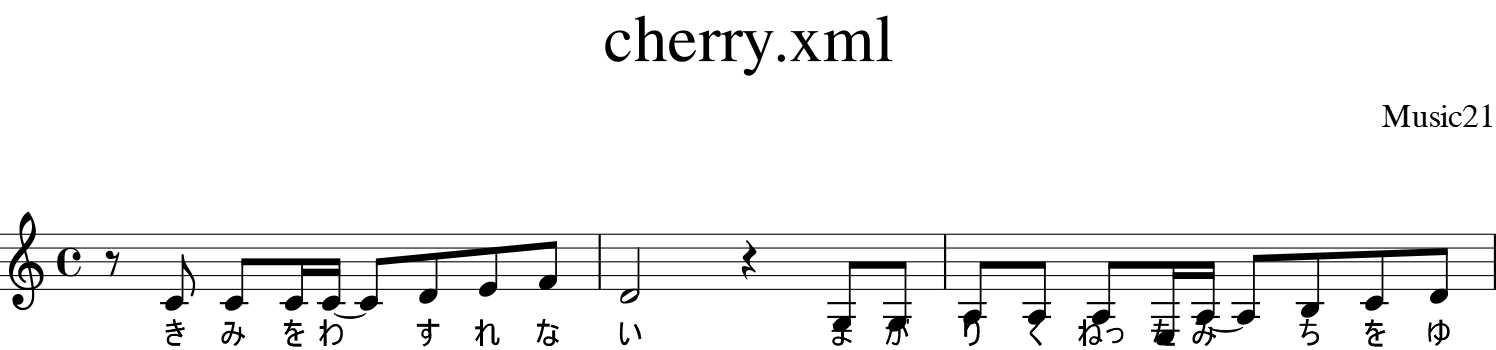

In [365]:
vocal1.show()

In [397]:
piece2 = m21.converter.parse("./TSUNAMI.xml")
vocal2 = piece2.parts[0]
piece3 = m21.converter.parse("./roman.xml")
vocal3 = piece3.parts[0]
piece4 = m21.converter.parse("./aporo3.xml")
vocal4 = piece4.parts[0]

In [412]:
piece5 = m21.converter.parse("./guren.mxl")
vocal5 = piece5.parts[0]
piece6 = m21.converter.parse("./konayuki.mxl")
vocal6 = piece6.parts[0]

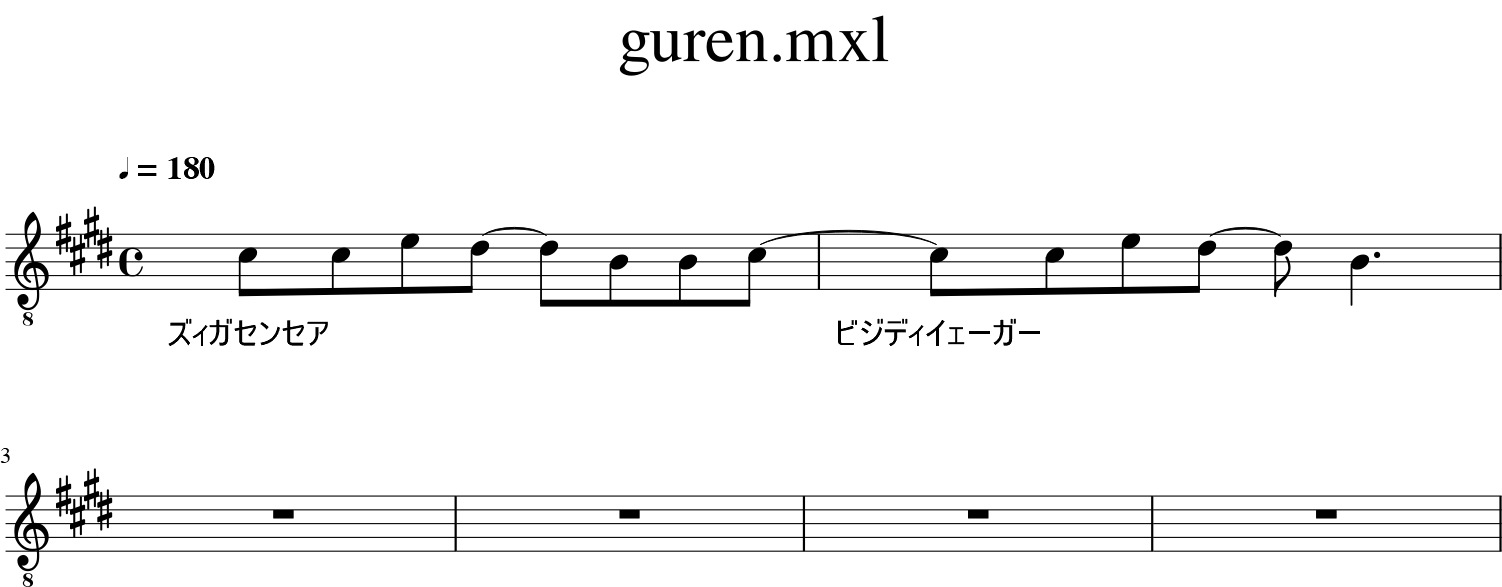

In [413]:
vocal5.show()

In [401]:
cherry = shuukei(vocal1)
tsunami = shuukei(vocal2.measures(1,42))
roman = shuukei(vocal3.measures(1,29))
aporo= shuukei(vocal4.measures(3,59))

In [417]:
guren = shuukei(vocal5.measures(12,51))
konayuki = shuukei(vocal6.measures(5,45))

In [418]:
guren

[[inf, 1.0],
 [59.0, 0.5],
 [61.0, 1.0],
 [58.0, 1.0],
 [59.0, 1.0],
 [56.0, 1.0],
 [58.0, 1.0],
 [54.0, 1.0],
 [inf, 0.5],
 [63.0, 1.0],
 [59.0, 0.5],
 [61.0, 1.0],
 [58.0, 1.0],
 [59.0, 1.0],
 [58.0, 1.0],
 [56.0, 1.0],
 [54.0, 1.0],
 [inf, 0.5],
 [63.0, 1.0],
 [59.0, 0.5],
 [61.0, 1.0],
 [58.0, 1.0],
 [59.0, 1.0],
 [56.0, 1.0],
 [58.0, 1.0],
 [54.0, 1.0],
 [inf, 0.5],
 [63.0, 1.0],
 [59.0, 0.5],
 [61.0, 1.0],
 [58.0, 1.0],
 [59.0, 1.0],
 [58.0, 1.0],
 [56.0, 1.0],
 [54.0, 1.0],
 [inf, 0.5],
 [63.0, 1.0],
 [59.0, 0.5],
 [61.0, 1.0],
 [58.0, 1.0],
 [59.0, 1.0],
 [56.0, 1.0],
 [58.0, 1.0],
 [54.0, 1.0],
 [inf, 0.5],
 [63.0, 1.0],
 [59.0, 0.5],
 [61.0, 1.0],
 [58.0, 1.0],
 [59.0, 1.0],
 [58.0, 1.0],
 [56.0, 1.0],
 [54.0, 1.0],
 [inf, 0.5],
 [63.0, 1.0],
 [59.0, 0.5],
 [61.0, 1.0],
 [58.0, 1.0],
 [59.0, 1.0],
 [56.0, 1.0],
 [58.0, 1.0],
 [54.0, 1.0],
 [inf, 0.5],
 [63.0, 1.0],
 [59.0, 0.5],
 [61.0, 1.0],
 [58.0, 1.0],
 [59.0, 1.0],
 [58.0, 1.0],
 [56.0, 1.0],
 [55.0, 1.0],
 [inf, 0.5],
 

In [419]:
konayuki

[[57.0, 1.0],
 [57.0, 0.5],
 [55.0, 0.25],
 [57.0, 1.75],
 [55.0, 0.5],
 [57.0, 0.5],
 [59.0, 0.25],
 [57.0, 0.5],
 [55.0, 0.25],
 [50.0, 2.0],
 [55.0, 0.5],
 [54.0, 1.5],
 [52.0, 0.25],
 [54.0, 1.75],
 [52.0, 0.25],
 [54.0, 0.5],
 [55.0, 0.25],
 [55.0, 0.5],
 [inf, 2.0],
 [inf, 0.75],
 [50.0, 0.25],
 [57.0, 1.5],
 [55.0, 0.5],
 [57.0, 1.5],
 [55.0, 0.5],
 [57.0, 0.5],
 [59.0, 0.25],
 [57.0, 0.5],
 [55.0, 0.25],
 [50.0, 2.0],
 [55.0, 0.5],
 [54.0, 1.5],
 [52.0, 0.25],
 [54.0, 1.75],
 [54.0, 0.25],
 [52.0, 0.25],
 [54.0, 0.25],
 [55.0, 0.25],
 [55.0, 0.5],
 [inf, 1.0],
 [inf, 0.5],
 [59.0, 0.25],
 [59.0, 0.25],
 [59.0, 0.25],
 [55.0, 0.5],
 [57.0, 0.5],
 [55.0, 0.25],
 [55.0, 1.5],
 [inf, 2.0],
 [inf, 0.5],
 [55.0, 0.25],
 [55.0, 0.25],
 [55.0, 0.25],
 [55.0, 0.5],
 [55.0, 0.25],
 [55.0, 0.25],
 [54.0, 0.5],
 [52.0, 0.5],
 [54.0, 0.25],
 [55.0, 1.5],
 [inf, 1.0],
 [inf, 2.0],
 [inf, 4.0],
 [57.0, 1.5],
 [55.0, 0.25],
 [57.0, 1.75],
 [55.0, 0.25],
 [55.0, 0.25],
 [57.0, 0.5],
 [59.0, 0.2

In [368]:
tsunami_pitch_bigram = make_pitch_bigram(tsunami)

In [421]:
guren_pitch_bigram = make_pitch_bigram(guren)
konayuki_pitch_bigram = make_pitch_bigram(konayuki)

In [422]:
guren_pitch_bigram


[-inf,
 2.0,
 -3.0,
 1.0,
 -3.0,
 2.0,
 -4.0,
 inf,
 -inf,
 -4.0,
 2.0,
 -3.0,
 1.0,
 -1.0,
 -2.0,
 -2.0,
 inf,
 -inf,
 -4.0,
 2.0,
 -3.0,
 1.0,
 -3.0,
 2.0,
 -4.0,
 inf,
 -inf,
 -4.0,
 2.0,
 -3.0,
 1.0,
 -1.0,
 -2.0,
 -2.0,
 inf,
 -inf,
 -4.0,
 2.0,
 -3.0,
 1.0,
 -3.0,
 2.0,
 -4.0,
 inf,
 -inf,
 -4.0,
 2.0,
 -3.0,
 1.0,
 -1.0,
 -2.0,
 -2.0,
 inf,
 -inf,
 -4.0,
 2.0,
 -3.0,
 1.0,
 -3.0,
 2.0,
 -4.0,
 inf,
 -inf,
 -4.0,
 2.0,
 -3.0,
 1.0,
 -1.0,
 -2.0,
 -1.0,
 inf,
 -inf,
 0.0,
 0.0,
 0.0,
 2.0,
 1.0,
 -1.0,
 -2.0,
 -1.0,
 inf,
 -inf,
 4.0,
 1.0,
 -5.0,
 5.0,
 2.0,
 -4.0,
 4.0,
 1.0,
 -5.0,
 5.0,
 1.0,
 inf,
 -inf,
 0.0,
 0.0,
 0.0,
 -5.0,
 5.0,
 -2.0,
 0.0,
 0.0,
 -5.0,
 5.0,
 2.0,
 0.0,
 0.0,
 0.0,
 -5.0,
 5.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 1.0,
 0.0,
 3.0,
 -1.0,
 -4.0,
 2.0,
 0.0,
 3.0,
 -1.0,
 -4.0,
 inf,
 -inf,
 0.0,
 3.0,
 -1.0,
 -2.0,
 0.0,
 -2.0,
 -3.0,
 3.0,
 inf,
 -inf,
 0.0,
 3.0,
 -1.0,
 -4.0,
 2.0,
 0.0,
 3.0,
 -1.0,
 -4.0,
 inf,
 -inf,
 0.0,
 3.0,
 -1.0,
 1.0,
 2.0,
 -7.0,
 9

In [328]:
tsunami_pitch_bigram_status = delete_inf(Counter(tsunami_pitch_bigram))

In [423]:
guren_pitch_bigram_status = delete_inf(Counter(guren_pitch_bigram))
konayuki_pitch_bigram_status = delete_inf(Counter(konayuki_pitch_bigram))

In [350]:
#バイグラム
tsunami_pitch_bigram_status

Counter({nan: 1,
         -7.0: 1,
         -5.0: 2,
         -4.0: 3,
         -3.0: 6,
         -2.0: 47,
         -1.0: 15,
         0.0: 32,
         1.0: 10,
         2.0: 36,
         3.0: 14,
         4.0: 9,
         5.0: 10,
         6.0: 1,
         7.0: 1,
         10.0: 1,
         12.0: 1})

In [424]:
#バイグラム
guren_pitch_bigram_status

Counter({-7.0: 1,
         -5.0: 6,
         -4.0: 20,
         -3.0: 14,
         -2.0: 16,
         -1.0: 20,
         0.0: 28,
         1.0: 14,
         2.0: 21,
         3.0: 14,
         4.0: 2,
         5.0: 5,
         9.0: 1})

In [330]:
tsunami_pitch_status = count_pitch(tsunami)
tsunami_pitch_status

Counter({45.0: 4,
         50.0: 12,
         52.0: 11,
         53.0: 2,
         54.0: 20,
         55.0: 17,
         56.0: 3,
         57.0: 35,
         58.0: 4,
         59.0: 29,
         60.0: 1,
         61.0: 9,
         62.0: 29,
         64.0: 24,
         66.0: 15,
         67.0: 2,
         69.0: 1,
         70.0: 1,
         inf: 31})

In [425]:
guren_pitch_status = count_pitch(guren)
guren_pitch_status
konayuki_pitch_status = count_pitch(konayuki)
konayuki_pitch_status

Counter({47.0: 1,
         50.0: 16,
         52.0: 21,
         54.0: 20,
         55.0: 54,
         57.0: 27,
         59.0: 25,
         60.0: 3,
         62.0: 12,
         64.0: 12,
         66.0: 7,
         67.0: 13,
         69.0: 4,
         inf: 23})

C:\Users\match\Anaconda3\lib\site-packages\matplotlib\transforms.py:443: RuntimeWarning: invalid value encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)


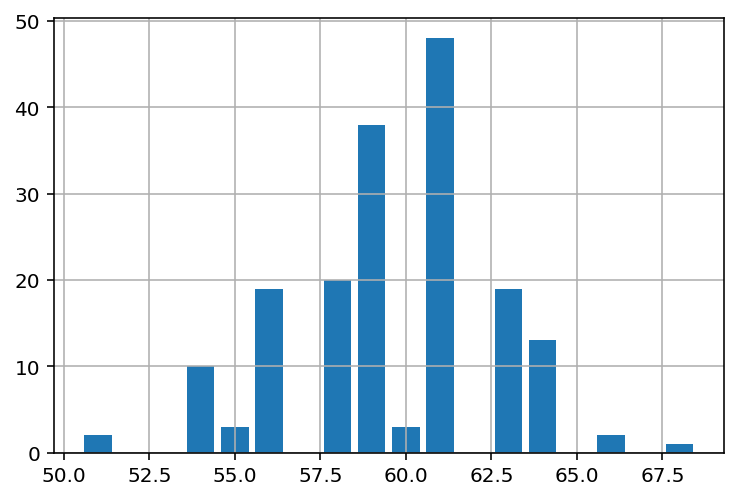

In [428]:
#音高の集計を可視化
left = guren_pitch_status.keys()
height = guren_pitch_status.values()
plt.bar(left,height)
plt.grid()

C:\Users\match\Anaconda3\lib\site-packages\matplotlib\transforms.py:443: RuntimeWarning: invalid value encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)


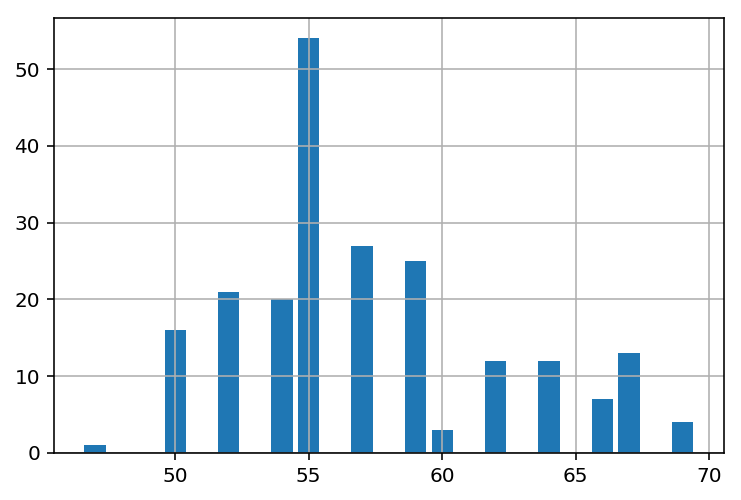

In [433]:
#音高の集計を可視化
left = konayuki_pitch_status.keys()
height = konayuki_pitch_status.values()
plt.bar(left,height)
plt.grid()

<BarContainer object of 20 artists>

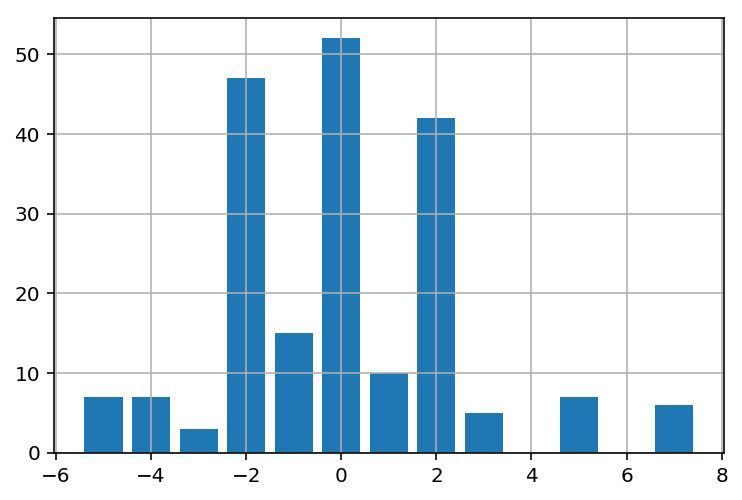

In [434]:
#音高Bigramの集計を可視化
left = konayuki_pitch_bigram_status.keys()
height = konayuki_pitch_bigram_status.values()
plt.grid()
plt.bar(left,height)

In [435]:
#TSUNAMIの跳躍
jump_rate(konayuki_pitch_bigram_status)

0.17412935323383086